In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [ ]:
# data_path = '/content/drive/MyDrive/ML-stuff/hellothere.csv'
data_path = '/content/drive/MyDrive/ML-stuff/dementia.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(data_path, index_col=0)
df.index.name = "Index"
df

,getFamiliarityScore,getConcretenessScore,getImagabilityScore,getAoaScore,getSUBTLWordScores,average_sentiment,features,label,text
Index,,,,,,,,,
0,314.000000,0.0,232.500000,1.395000,0.0,0.048000,"[314.0, 0.0, 232.5, 1.395, 0.0, 0.048, nan, na...",Control,"['\n', 'the', 'scene', 'is', 'in', 'the', 'in'..."
1,471.000000,0.0,348.750000,2.092500,0.0,0.013487,"[471.0, 0.0, 348.75, 2.0925000000000002, 0.0, ...",Control,"['\n', 'oh', 'I', 'see', 'the', 'sink', 'is', ..."
2,314.000000,0.0,232.500000,1.395000,0.0,0.028269,"[314.0, 0.0, 232.5, 1.395, 0.0, 0.028268750000...",Control,"['\n', 'um', 'a', 'boy', 'and', 'a', 'girl', '..."
3,0.000000,0.0,0.000000,0.000000,0.0,0.063783,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.06378333333333334,...",Control,"['\n', 'okay', '\n', 'it', 'was', 'summertime'..."
4,314.000000,0.0,232.500000,1.395000,0.0,0.078679,"[314.0, 0.0, 232.5, 1.395, 0.0, 0.078678571428...",Control,"['\n', 'clears', 'throat', 'wait', 'un', 'til'..."
...,...,...,...,...,...,...,...,...,...
1278,586.133333,0.0,434.000000,2.604000,0.0,0.154825,"[586.1333333333333, 0.0, 434.0, 2.603999999999...",Dementia,"['\n', 'pencil', 'q', '\n', 'oh', '\n', 'uh', ..."
1279,538.285714,0.0,398.571429,2.391429,0.0,0.034022,"[538.2857142857143, 0.0, 398.57142857142856, 2...",Dementia,"['\n', 'tree', 'q', 'exc', '\n', 'uh', '\n', '..."
1280,314.000000,0.0,232.500000,1.395000,0.0,0.016444,"[314.0, 0.0, 232.5, 1.395, 0.0, 0.016444444444...",Dementia,"['\n', 'uh', 'write', 'me', 'a', 'letter', '\n..."


(1283, 9)

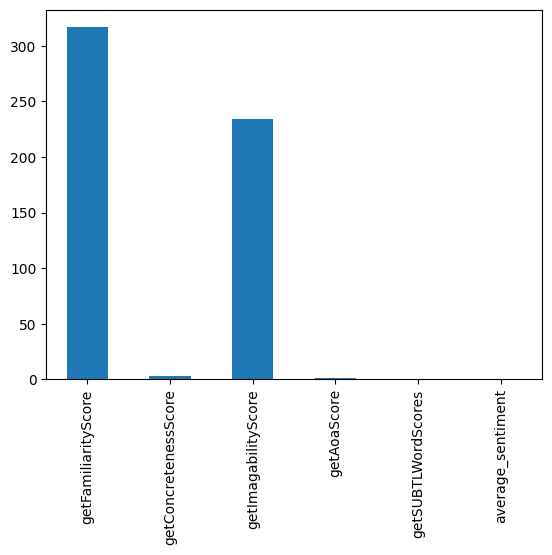

In [ ]:
attributes = ['getFamiliarityScore',	'getConcretenessScore',	'getImagabilityScore',	'getAoaScore', 'getSUBTLWordScores',	'average_sentiment']
df[attributes].mean().plot.bar()
df.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print(df.columns)

Index(['getFamiliarityScore', 'getConcretenessScore', 'getImagabilityScore',
       'getAoaScore', 'getSUBTLWordScores', 'average_sentiment', 'features',
       'label', 'text'],
      dtype='object')


In [ ]:
df["label"] = df["label"].map({"Control": 0, "Dementia": 1})

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Drop "features" and "text" columns
df.drop(["features", "text"], axis=1, inplace=True)

# Split data into features (X) and target (y)
X = df.drop("label", axis=1)
y = df["label"]

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.19, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.526, random_state=42)

# Output the sizes of each set
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

Training set size: 1039
Validation set size: 115
Testing set size: 129


# Testing Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_test, y_test)

# Make predictions on the training set
y_test_pred = model.predict(X_test)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate evaluation metrics for training set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_tn, test_fp, test_fn, test_tp = test_conf_matrix.ravel()

# Calculate evaluation metrics for validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_tn, val_fp, val_fn, val_tp = val_conf_matrix.ravel()

# Output the evaluation metrics for training set
print("Training Set Metrics:")
print("Precision:", test_precision)
print("Accuracy:", test_accuracy)
print("F1 Score:", test_f1)
print("True Positives:", test_tp)
print("False Positives:", test_fp)
print("True Negatives:", test_tn)
print("False Negatives:", test_fn)

# Output the evaluation metrics for validation set
print("\nValidation Set Metrics:")
print("Precision:", val_precision)
print("Accuracy:", val_accuracy)
print("F1 Score:", val_f1)
print("True Positives:", val_tp)
print("False Positives:", val_fp)
print("True Negatives:", val_tn)
print("False Negatives:", val_fn)

Training Set Metrics:
Precision: 0.7984496124031008
Accuracy: 0.7984496124031008
F1 Score: 0.8879310344827586
True Positives: 103
False Positives: 26
True Negatives: 0
False Negatives: 0

Validation Set Metrics:
Precision: 0.8173913043478261
Accuracy: 0.8173913043478261
F1 Score: 0.8995215311004785
True Positives: 94
False Positives: 21
True Negatives: 0
False Negatives: 0


In [ ]:
# Find the indices of false positive predictions in the validation set
false_positives_indices = [i for i, (pred, actual) in enumerate(zip(y_val_pred, y_val)) if pred == 1 and actual == 0]

# Print out a few false positive predictions
for index in false_positives_indices[:5]:  # Print the first 5 false positive predictions
    print("Index:", index)
    print("Predicted Label:", y_val_pred[index])
    print("Actual Label:", y_val.iloc[index])
    print("Features:", X_val.iloc[index])  # Print out the corresponding features
    print("------")

Index: 10
Predicted Label: 1
Actual Label: 0
Features: getFamiliarityScore     0.000000
getConcretenessScore    0.000000
getImagabilityScore     0.000000
getAoaScore             0.000000
getSUBTLWordScores      0.000000
average_sentiment       0.053554
Name: 31, dtype: float64
------
Index: 12
Predicted Label: 1
Actual Label: 0
Features: getFamiliarityScore     418.666667
getConcretenessScore      0.000000
getImagabilityScore     310.000000
getAoaScore               1.860000
getSUBTLWordScores        0.000000
average_sentiment         0.000000
Name: 29, dtype: float64
------
Index: 29
Predicted Label: 1
Actual Label: 0
Features: getFamiliarityScore     418.666667
getConcretenessScore      0.000000
getImagabilityScore     310.000000
getAoaScore               1.860000
getSUBTLWordScores        0.000000
average_sentiment         0.077978
Name: 43, dtype: float64
------
Index: 32
Predicted Label: 1
Actual Label: 0
Features: getFamiliarityScore     418.666667
getConcretenessScore      0.000

## Testing Random Forest

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier()

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_rf = rf_model.predict(X_val)

# Make predictions on the testing set
y_test_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for validation set
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
val_precision_rf = precision_score(y_val, y_val_pred_rf)
val_recall_rf = recall_score(y_val, y_val_pred_rf)
val_f1_rf = f1_score(y_val, y_val_pred_rf)
val_conf_matrix_rf = confusion_matrix(y_val, y_val_pred_rf)
val_tn_rf, val_fp_rf, val_fn_rf, val_tp_rf = val_conf_matrix_rf.ravel()

# Calculate evaluation metrics for testing set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)
test_conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
test_tn_rf, test_fp_rf, test_fn_rf, test_tp_rf = test_conf_matrix_rf.ravel()

# Output the evaluation metrics for Random Forest on validation set
print("Random Forest Metrics on Validation Set:")
print("Accuracy:", val_accuracy_rf)
print("Precision:", val_precision_rf)
print("F1 Score:", val_f1_rf)
print("True Positives:", val_tp_rf)
print("True Negatives:", val_tn_rf)
print("False Positives:", val_fp_rf)
print("False Negatives:", val_fn_rf)

# Output the evaluation metrics for Random Forest on testing set
print("\nRandom Forest Metrics on Testing Set:")
print("Accuracy:", test_accuracy_rf)
print("Precision:", test_precision_rf)
print("F1 Score:", test_f1_rf)
print("True Positives:", test_tp_rf)
print("True Negatives:", test_tn_rf)
print("False Positives:", test_fp_rf)
print("False Negatives:", test_fn_rf)

Random Forest Metrics on Validation Set:
Accuracy: 0.7217391304347827
Precision: 0.8229166666666666
F1 Score: 0.8315789473684212
True Positives: 79
True Negatives: 4
False Positives: 17
False Negatives: 15

Random Forest Metrics on Testing Set:
Accuracy: 0.7209302325581395
Precision: 0.819047619047619
F1 Score: 0.826923076923077
True Positives: 86
True Negatives: 7
False Positives: 19
False Negatives: 17


# Neural Network w Attention

In [ ]:
X_train.shape

(1039, 6)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Attention
from tensorflow.keras import backend as K

# Define input shape
input_shape = X_train.shape[1]  # Assuming X_train is 2D

# Define dense layers for linguistic features
linguistic_dense_1 = Dense(32, activation='relu')
linguistic_dense_2 = Dense(16, activation='relu')

# Define attention mechanism
attention = Attention()

# Define output layer
output_layer = Dense(1, activation='sigmoid')

# Define input layer
input_layer = Input(shape=(input_shape,))

# Apply dense layers for linguistic features
linguistic_features = linguistic_dense_1(input_layer)
linguistic_features = linguistic_dense_2(linguistic_features)

# Apply attention mechanism
context_vector = attention([linguistic_features, linguistic_features])

# Concatenate linguistic features with context vector
merged_vector = K.concatenate([linguistic_features, context_vector], axis=-1)

# Apply output layer
output = output_layer(merged_vector)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model on the training set
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val))

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 32)                   224       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 16)                   528       ['dense[0][0]']               
                                                                                                  
 attention (Attention)       (None, 16)                   0         ['dense_1[0][0]',             
                                                                     'dense_1[0][0]']         

In [ ]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

# Calculate evaluation metrics for validation set
val_accuracy = accuracy_score(y_val, y_val_pred_binary)
val_precision = precision_score(y_val, y_val_pred_binary)
val_recall = recall_score(y_val, y_val_pred_binary)
NNA_val_f1 = f1_score(y_val, y_val_pred_binary)
val_conf_matrix = confusion_matrix(y_val, y_val_pred_binary)
val_tn, val_fp, val_fn, val_tp = val_conf_matrix.ravel()

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1 Score:", NNA_val_f1)
print("True Positives:", val_tp)
print("True Negatives:", val_tn)
print("False Positives:", val_fp)
print("False Negatives:", val_fn)

# Make predictions on the testing set
y_test_pred = model.predict(X_test)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Calculate evaluation metrics for testing set
test_accuracy = accuracy_score(y_test, y_test_pred_binary)
test_precision = precision_score(y_test, y_test_pred_binary)
test_recall = recall_score(y_test, y_test_pred_binary)
NNA_test_f1 = f1_score(y_test, y_test_pred_binary)
test_conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
test_tn, test_fp, test_fn, test_tp = test_conf_matrix.ravel()

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", NNA_test_f1)
print("True Positives:", test_tp)
print("True Negatives:", test_tn)
print("False Positives:", test_fp)
print("False Negatives:", test_fn)

4/4 [==============================] - 0s 3ms/step
Validation Set Metrics:
Accuracy: 0.8173913043478261
Precision: 0.8173913043478261
Recall: 1.0
F1 Score: 0.8995215311004785
True Positives: 94
True Negatives: 0
False Positives: 21
False Negatives: 0
5/5 [==============================] - 0s 2ms/step

Testing Set Metrics:
Accuracy: 0.7984496124031008
Precision: 0.7984496124031008
Recall: 1.0
F1 Score: 0.8879310344827586
True Positives: 103
True Negatives: 0
False Positives: 26
False Negatives: 0


## Neural Network w/o Attention

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
dnn_no_attention_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    #Dropout(0.5),
    Dense(8, activation='relu'),
    #Dropout(0.5),
    Dense(4, activation='relu'),
    #Dropout(0.5),
    Dense(1, activation='relu')
])

# Compile the model
dnn_no_attention_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
dnn_no_attention_model.summary()

# Train the model on the training set
history_no_attention = dnn_no_attention_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                112       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 4)                 36        
                                                                 
 dense_30 (Dense)            (None, 1)                 5         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
17/17 [==============================] - 4s 15ms/step - loss: 4.2097 - accuracy: 0.5390 - val_loss: 3.0026 - val_accuracy: 0.6348
Epoch 2/10
17/1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the validation set
y_val_pred_no_attention = dnn_no_attention_model.predict(X_val)
y_val_pred_binary_no_attention = (y_val_pred_no_attention > 0.5).astype(int)

# Calculate evaluation metrics for validation set
val_accuracy_no_attention = accuracy_score(y_val, y_val_pred_binary_no_attention)
val_precision_no_attention = precision_score(y_val, y_val_pred_binary_no_attention)
val_recall_no_attention = recall_score(y_val, y_val_pred_binary_no_attention)
val_f1_no_attention = f1_score(y_val, y_val_pred_binary_no_attention)
val_conf_matrix_no_attention = confusion_matrix(y_val, y_val_pred_binary_no_attention)
val_tn_no_attention, val_fp_no_attention, val_fn_no_attention, val_tp_no_attention = val_conf_matrix_no_attention.ravel()

print("Validation Set Metrics (No Attention):")
print("Accuracy:", val_accuracy_no_attention)
print("Precision:", val_precision_no_attention)
print("Recall:", val_recall_no_attention)
print("F1 Score:", val_f1_no_attention)
print("True Positives:", val_tp_no_attention)
print("True Negatives:", val_tn_no_attention)
print("False Positives:", val_fp_no_attention)
print("False Negatives:", val_fn_no_attention)

# Make predictions on the testing set
y_test_pred_no_attention = dnn_no_attention_model.predict(X_test)
y_test_pred_binary_no_attention = (y_test_pred_no_attention > 0.5).astype(int)

# Calculate evaluation metrics for testing set
test_accuracy_no_attention = accuracy_score(y_test, y_test_pred_binary_no_attention)
test_precision_no_attention = precision_score(y_test, y_test_pred_binary_no_attention)
test_recall_no_attention = recall_score(y_test, y_test_pred_binary_no_attention)
test_f1_no_attention = f1_score(y_test, y_test_pred_binary_no_attention)
test_conf_matrix_no_attention = confusion_matrix(y_test, y_test_pred_binary_no_attention)
test_tn_no_attention, test_fp_no_attention, test_fn_no_attention, test_tp_no_attention = test_conf_matrix_no_attention.ravel()

print("\nTesting Set Metrics (No Attention):")
print("Accuracy:", test_accuracy_no_attention)
print("Precision:", test_precision_no_attention)
print("Recall:", test_recall_no_attention)
print("F1 Score:", test_f1_no_attention)
print("True Positives:", test_tp_no_attention)
print("True Negatives:", test_tn_no_attention)
print("False Positives:", test_fp_no_attention)
print("False Negatives:", test_fn_no_attention)

4/4 [==============================] - 0s 3ms/step
Validation Set Metrics (No Attention):
Accuracy: 0.6347826086956522
Precision: 0.8333333333333334
Recall: 0.6914893617021277
F1 Score: 0.7558139534883721
True Positives: 65
True Negatives: 8
False Positives: 13
False Negatives: 29
5/5 [==============================] - 0s 2ms/step

Testing Set Metrics (No Attention):
Accuracy: 0.6589147286821705
Precision: 0.8314606741573034
Recall: 0.7184466019417476
F1 Score: 0.7708333333333335
True Positives: 74
True Negatives: 11
False Positives: 15
False Negatives: 29


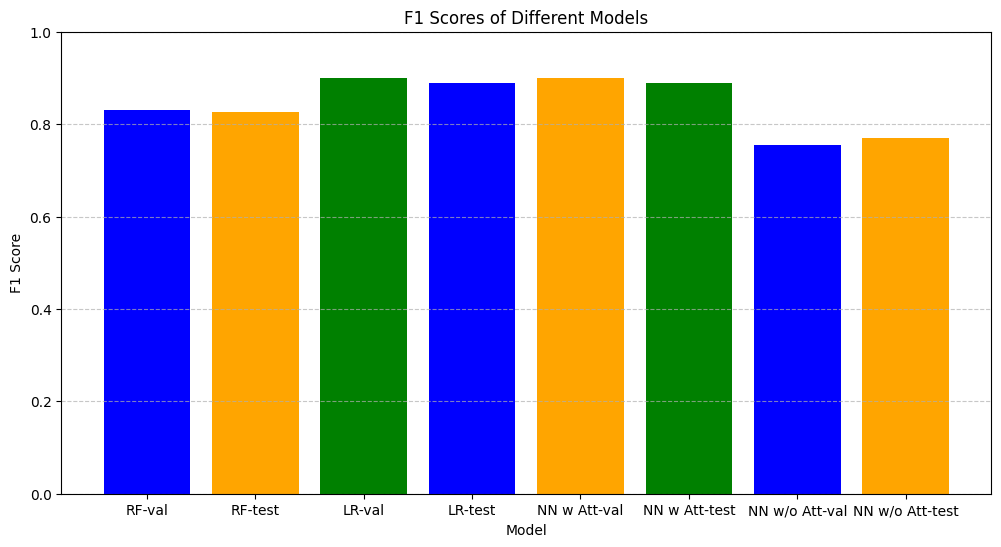

In [ ]:
import matplotlib.pyplot as plt

# F1 scores for different models
f1_scores = {
    'RF-val': val_f1_rf,
    'RF-test': test_f1_rf,
    'LR-val' : val_f1,
    'LR-test' : test_f1,
    'NN w Att-val': NNA_val_f1,
    'NN w Att-test' : NNA_test_f1,
    'NN w/o Att-val': val_f1_no_attention,
    'NN w/o Att-test': test_f1_no_attention
}

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['blue', 'orange', 'green'])
plt.title('F1 Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # Set y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import pandas as pd

# Create a dictionary with evaluation metrics
metrics_data = {
    'Model': ['LR-val', 'LR-test', 'RF-val', 'RF-test', 'NN w Att-val', 'NN w Att_test', 'NN w/o Att_val', 'NN w/o Att-test'],
    'F1 Score': [val_f1, test_f1, val_f1_rf, test_f1_rf, NNA_val_f1, NNA_test_f1, val_f1_no_attention, test_f1_no_attention],
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_data)

# Set the model column as the index
metrics_df.set_index('Model', inplace=True)

# Display the DataFrame
print(metrics_df)


                 F1 Score
Model                    
LR-val           0.899522
LR-test          0.887931
RF-val           0.831579
RF-test          0.826923
NN w Att-val     0.899522
NN w Att_test    0.887931
NN w/o Att_val   0.755814
NN w/o Att-test  0.770833
